# Statistics for Data Mining (M.Sc.)

In this part we will load the data from `"../data/wine_dataset_assignment.csv"` and perform some basic statistical analysis.

In [1]:
DATA_PATH = "../data/"
FILE_PATH = DATA_PATH + "wine_dataset_assignment.csv"

In [ ]:
# load the data using pandas
import pandas as pd

data = pd.read_csv(FILE_PATH)

In [ ]:
# show the table

data.head()

In [ ]:
# print a list of attributes/columns in the dataset

attrs = data.columns.tolist()
for attr in attrs:
    print(attr)

In [ ]:
# print the dtype of each column

dtypes = data.dtypes
for attr, dtype in zip(attrs, dtypes):
    print(f"{attr}: {dtype}")

### Basic Statistical Analysis

Perform initial statistical analyses where relevant, including:

* Mean, variance, standard deviation, median
* Mean absolute deviation
* Range, midrange, percentage of errors, and relevant proportions

In [ ]:
# perform statistical analysis on the numerical attributes

numerical_attrs = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

for attr in numerical_attrs:
    col_data = data[attr]
    mean = col_data.mean()
    variance = col_data.var()
    std_dev = col_data.std()
    median = col_data.median()
    data_range = col_data.max() - col_data.min()
    midrange = (col_data.max() + col_data.min()) / 2

    print(f"Attribute: {attr}")
    print(f" Mean: {mean:.2f}")
    print(f" Variance: {variance:.2f}")
    print(f" Standard Deviation: {std_dev:.2f}")
    print(f" Median: {median:.2f}")
    print(f" Range: {data_range:.2f}")
    print(f" Midrange: {midrange:.2f}")
    print("-" * 40)

In [ ]:
# create a df for the results
import numpy as np

results = []
for attr in numerical_attrs:
    col_data = data[attr]
    results.append({
        "Attribute": attr,
        "Mean": col_data.mean(),
        "Variance": col_data.var(),
        "Standard Deviation": col_data.std(),
        "Median": col_data.median(),
        "Range": col_data.max() - col_data.min(),
        "Midrange": (col_data.max() + col_data.min()) / 2
    })

In [ ]:
# show the df
results_df = pd.DataFrame(results)

results_df

### Frequency Analysis

Create **frequency tables** including:

* Frequency, relative frequency, cumulative frequency
* Class boundaries (real and imaginary), class width
* Median, interquartile range, and relevant percentiles (e.g., 0.1, 0.9)

In [29]:
import pandas as pd

selected_attr = numerical_attrs[1]
col_data = data[selected_attr].dropna()

n_bins = 10  # change as needed
binned = pd.cut(col_data, bins=n_bins, include_lowest=True)
freq_table = binned.value_counts().sort_index().reset_index()
freq_table.columns = ['Interval', 'Frequency']
freq_table['Relative Frequency'] = freq_table['Frequency'] / freq_table['Frequency'].sum()  # note .sum()
freq_table['Cumulative Frequency'] = freq_table['Frequency'].cumsum()

freq_table

,Interval,Frequency,Relative Frequency,Cumulative Frequency
0,"(0.734, 1.246]",18,0.101124,18
1,"(1.246, 1.752]",59,0.331461,77
2,"(1.752, 2.258]",33,0.185393,110
3,"(2.258, 2.764]",16,0.089888,126
4,"(2.764, 3.27]",14,0.078652,140
5,"(3.27, 3.776]",11,0.061798,151
6,"(3.776, 4.282]",14,0.078652,165
7,"(4.282, 4.788]",7,0.039326,172
8,"(4.788, 5.294]",3,0.016854,175
9,"(5.294, 5.8]",3,0.016854,178


In [30]:
# show the results
freq_table

,Interval,Frequency,Relative Frequency,Cumulative Frequency
0,"(0.734, 1.246]",18,0.101124,18
1,"(1.246, 1.752]",59,0.331461,77
2,"(1.752, 2.258]",33,0.185393,110
3,"(2.258, 2.764]",16,0.089888,126
4,"(2.764, 3.27]",14,0.078652,140
5,"(3.27, 3.776]",11,0.061798,151
6,"(3.776, 4.282]",14,0.078652,165
7,"(4.282, 4.788]",7,0.039326,172
8,"(4.788, 5.294]",3,0.016854,175
9,"(5.294, 5.8]",3,0.016854,178


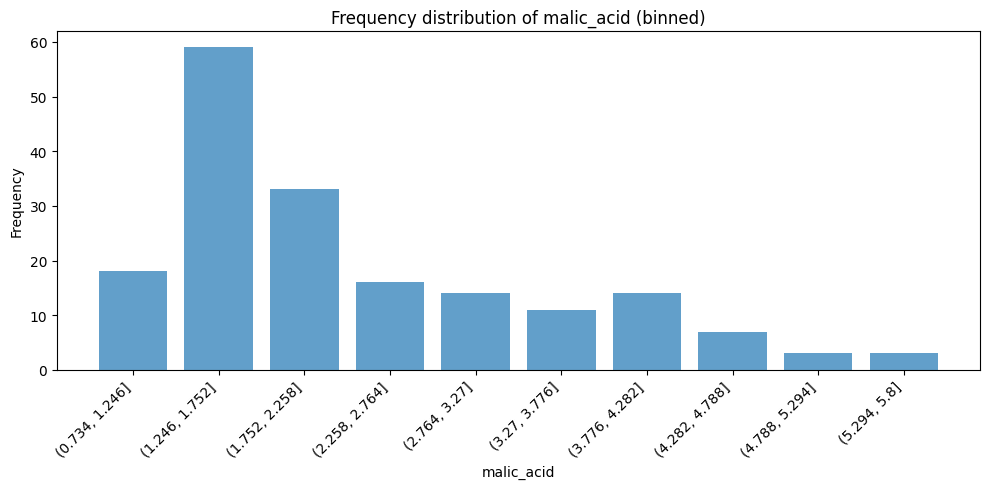

In [32]:
import matplotlib.pyplot as plt

# freq_table assumed to have columns: 'Interval' (pd.Interval) and 'Frequency'
x_labels = freq_table['Interval'].astype(str)

plt.figure(figsize=(10, 5))
plt.bar(x_labels, freq_table['Frequency'], alpha=0.7, color='C0')
plt.xticks(rotation=45, ha='right')
plt.xlabel(selected_attr)
plt.ylabel('Frequency')
plt.title(f'Frequency distribution of {selected_attr} (binned)')
plt.tight_layout()
plt.show()

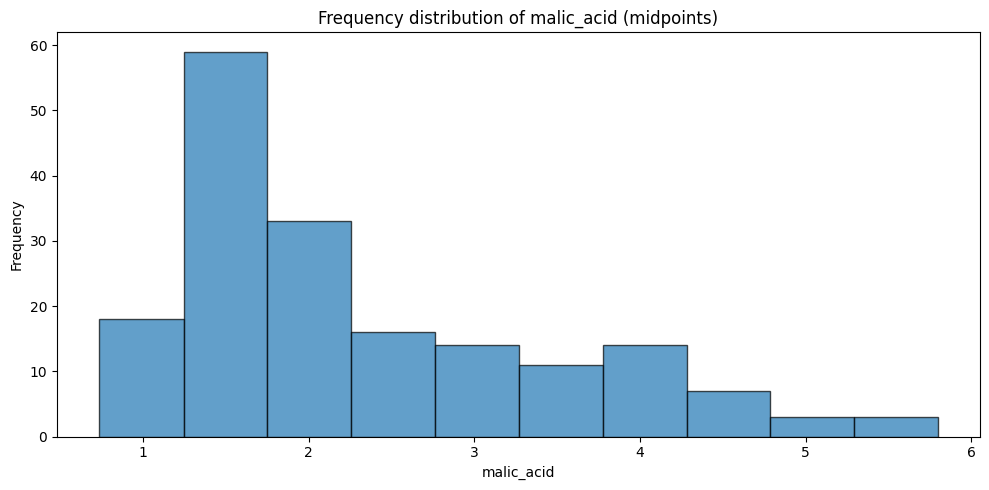

In [33]:
import matplotlib.pyplot as plt

# requires 'Interval' column of Interval objects (from pd.cut)
midpoints = freq_table['Interval'].apply(lambda iv: iv.mid)
widths = freq_table['Interval'].apply(lambda iv: iv.right - iv.left)

plt.figure(figsize=(10, 5))
plt.bar(midpoints, freq_table['Frequency'], width=widths, align='center', alpha=0.7, color='C0', edgecolor='k')
plt.xlabel(selected_attr)
plt.ylabel('Frequency')
plt.title(f'Frequency distribution of {selected_attr} (midpoints)')
plt.tight_layout()
plt.show()

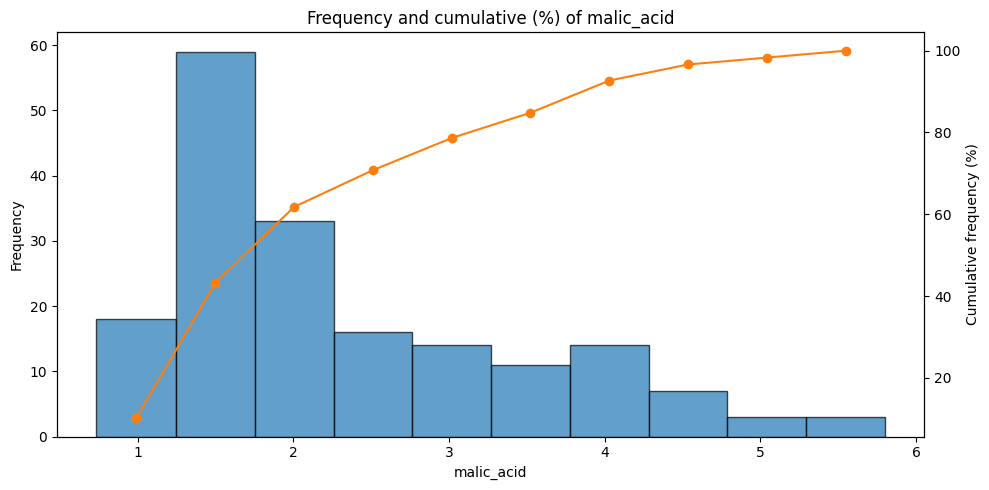

In [35]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

# bars (midpoint version)
ax1.bar(midpoints, freq_table['Frequency'], width=widths, alpha=0.7, color='C0', edgecolor='k')
ax1.set_ylabel('Frequency')

# cumulative (as percent)
cum_pct = freq_table['Frequency'].cumsum() / freq_table['Frequency'].sum() * 100
ax2.plot(midpoints, cum_pct, color='C1', marker='o')
ax2.set_ylabel('Cumulative frequency (%)')

ax1.set_xlabel(selected_attr)
ax1.set_title(f'Frequency and cumulative (%) of {selected_attr}')
plt.tight_layout()
plt.show()

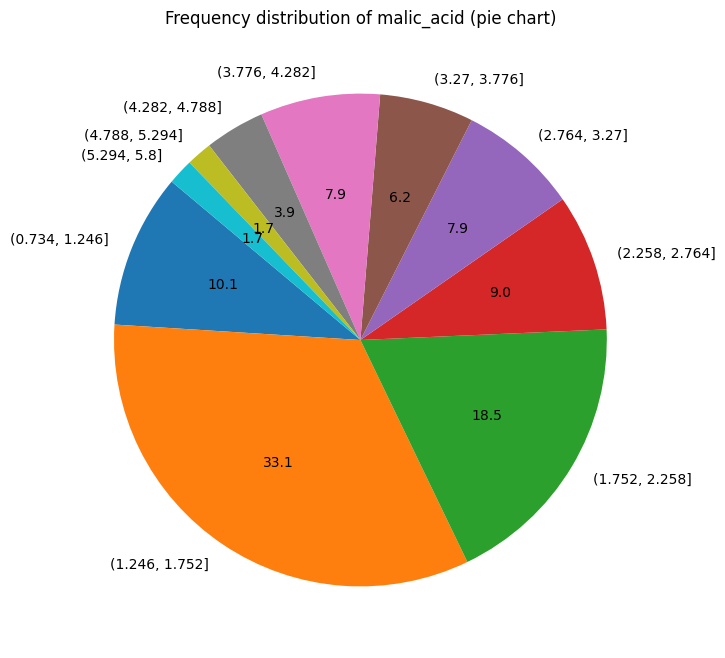

In [36]:
# create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(freq_table['Frequency'], labels=x_labels, autopct='%1.1f', startangle=140)
plt.title(f'Frequency distribution of {selected_attr} (pie chart)')
plt.show()